In [1]:
#I. 관광객 수 데이터 전처리

In [2]:
#데이터 불러오기, 슬라이싱

import pandas as pd

path = r'C:\Users\Gargantua\Desktop\files\4_tourists\kto_201001.xlsx'
kto_201001 = pd.read_excel(path, 
                          header = 1,
                          skipfooter = 4,
                          usecols = 'A:G')    #방문객 수에 대해 슬라이싱

kto_201001.head()
kto_201001.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537
66,교포,0,0,0,0,22537,22537


In [3]:
#데이터 전처리하기

kto_201001.info() #변수 형태 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
국적       67 non-null object
관광       67 non-null int64
상용       67 non-null int64
공용       67 non-null int64
유학/연수    67 non-null int64
기타       67 non-null int64
계        67 non-null int64
dtypes: int64(6), object(1)
memory usage: 3.7+ KB


In [4]:
kto_201001.describe() #변수 통계치 확인

,관광,상용,공용,유학/연수,기타,계
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11964.716418,683.462687,81.731343,152.776119,4115.910448,16998.597015
std,47055.349998,2639.234303,370.034666,622.299519,11560.294887,59189.624627
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,254.000000,23.500000,0.000000,6.000000,161.500000,605.000000
50%,554.000000,47.000000,2.000000,17.000000,449.000000,1350.000000
75%,3638.000000,301.000000,14.000000,54.500000,1608.000000,7582.000000
max,329131.000000,18238.000000,2159.000000,4339.000000,80916.000000,433045.000000


In [5]:
#조건을 통해 필터링 해보기

#줄 바꾸어 계속 문장 작성시에는 \ 활용하기

condition = (kto_201001['관광'] == 0) \
            | (kto_201001['상용'] == 0) \
            | (kto_201001['공용'] == 0) \
            | (kto_201001['유학/연수'] == 0)
            
kto_201001[condition]

,국적,관광,상용,공용,유학/연수,기타,계
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
6,말레이시아,3292,61,0,49,1157,4559
16,캄보디아,102,22,0,25,131,280
19,이란,69,309,0,3,217,598
20,이스라엘,792,11,0,0,53,856
24,GCC,223,134,0,18,55,430
38,스위스,512,30,0,7,77,626
40,덴마크,378,28,0,5,94,505
41,노르웨이,517,274,0,6,149,946


In [6]:
#기준년월 추가하기

kto_201001['기준연월'] = '2010-01'
kto_201001.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
0,아시아주,329131,18238,421,4339,80916,433045,2010-01
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01


In [7]:
# 국적 데이터만 남기기

kto_201001['국적'].unique()    #중복되는 값 제거하고 존재하는 값 살펴보기

# --> '아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'  국적이 아닌 대륙임을 확인 

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [8]:
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

condition = (kto_201001['국적'].isin(continents_list) == False)    # kto_201001.국적  과  kto_201001['국적'] 은 같음.
kto_201001_country = kto_201001[condition]    #국적을 기준으로 필터링 되며 나머지 자료들은 국적에 맞추어 저장됨.
kto_201001_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [9]:
kto_201001_country.head()   #인덱스 값이 중간중간 삭제되어 있음이 확인됨(대륙에 대한 인덱스 삭제) 

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01
5,태국,13374,39,13,53,4335,17814,2010-01


In [10]:
kto_201001_country_newindex = kto_201001_country.reset_index(drop = True)    #drop = True 를 넣지 않으면 기존 인덱스 값이 새로운 칼럼으로 형성됨.
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
0,일본,202825,1750,89,549,3971,209184,2010-01
1,대만,35788,41,17,37,516,36399,2010-01
2,홍콩,13874,55,0,21,595,14545,2010-01
3,마카오,554,0,0,0,0,554,2010-01
4,태국,13374,39,13,53,4335,17814,2010-01


In [11]:
#대륙 칼럼 추가하기

#엑셀 파일에 들어가서 국가 수 확인 --> 아시아주 : 25개 / 미주 : 5개 / 구주 : 23개 / 대양주 : 3개 / 아프리카 : 2개 / 기타대륙 : 1개 / 교포소계 : 1개

continents = ['아시아']*25 + ['미주']*5 + ['구주']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙']*1 + ['교포']*1

kto_201001_country_newindex['대륙'] = continents

kto_201001_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙
55,대양주 기타,730,0,4,4,168,906,2010-01,대양주
56,남아프리카공화국,214,27,0,2,545,788,2010-01,아프리카
57,아프리카 기타,349,594,25,86,296,1350,2010-01,아프리카
58,국적미상,10,3,0,0,0,13,2010-01,기타대륙
59,교포,0,0,0,0,22537,22537,2010-01,교포


In [12]:
#관광객 비율

kto_201001_country_newindex['관광객 비율(%)'] = round(kto_201001_country_newindex['관광'] / kto_201001_country_newindex['계'] * 100 , 1)

kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객 비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1


In [13]:
#관광객 비율에 따라 재정렬 해보기

kto_201001_country_newindex.sort_values(by = '관광객 비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객 비율(%)
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
19,이스라엘,792,11,0,0,53,856,2010-01,아시아,92.5


In [14]:
kto_201001_country_newindex.sort_values(by = '관광객 비율(%)').head()    #별도 ascending 값을 지정하지 않으면 오름차순 정렬됨.

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객 비율(%)
59,교포,0,0,0,0,22537,22537,2010-01,교포,0.0
12,스리랑카,39,28,2,13,566,648,2010-01,아시아,6.0
13,파키스탄,70,200,1,41,402,714,2010-01,아시아,9.8
18,이란,69,309,0,3,217,598,2010-01,아시아,11.5
14,방글라데시,86,84,9,42,489,710,2010-01,아시아,12.1


In [15]:
#전체에 대한 국가별 관광객비율 추가하기

tourist_sum = sum(kto_201001_country_newindex['관광'])

kto_201001_country_newindex['전체비율(%)'] = round(kto_201001_country_newindex['관광'] / tourist_sum * 100 , 1)

kto_201001_country_newindex.head()


,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객 비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [16]:
#전체비율로 sort 해보기

kto_201001_country_newindex.sort_values('전체비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객 비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
25,미국,26943,1195,2145,135,12647,43065,2010-01,미주,62.6,6.7
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5


In [17]:
#대륙별 평균 관광객 비율 알아보기

kto_201001_country_newindex.pivot_table(values = '관광객 비율(%)',
                                       index = '대륙',
                                       aggfunc = 'mean')

,관광객 비율(%)
대륙,
교포,0.000000
구주,60.926087
기타대륙,76.900000
대양주,79.733333
미주,60.760000
아시아,49.544000
아프리카,26.550000


In [18]:
#중국 관광객 필터링하기

condition = (kto_201001_country_newindex['국적'] == '중국')
kto_201001_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객 비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1


In [19]:
#데이터 전처리 과정 함수화 하기

def create_kto_data(yy,mm):
    file_path = r'C:\Users\Gargantua\Desktop\files\4_tourists\kto_{}{}.xlsx'.format(yy, mm)
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = 'A:G')
    
    df['기준연월'] = '{}-{}'.format(yy,mm)
    
    continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    condition = (df.국적.isin(continents_list) == False)
    df_country = df[condition].reset_index(drop=True)
    
    continents = ['아시아']*25 + ['미주']*5 + ['구주']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙']*1 + ['교포']*1
    df_country['대륙'] = continents
    
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1)
    
    df_tour_total = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country.관광 / df_tour_total * 100, 1)
    
    return (df_country)

In [20]:
#전처리함수 테스트

test_df = create_kto_data(2010,str(1).zfill(2))

test_df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
55,대양주 기타,730,0,4,4,168,906,2010-01,대양주,80.6,0.2
56,남아프리카공화국,214,27,0,2,545,788,2010-01,아프리카,27.2,0.1
57,아프리카 기타,349,594,25,86,296,1350,2010-01,아프리카,25.9,0.1
58,국적미상,10,3,0,0,0,13,2010-01,기타대륙,76.9,0.0
59,교포,0,0,0,0,22537,22537,2010-01,교포,0.0,0.0


In [21]:
#다수의 엑셀파일 불러오기

mm=01
print(mm)  #01은 출력이 안된다 --> zfill 필요

SyntaxError: invalid token (<ipython-input-21-8674ca776bc9>, line 3)

In [ ]:
mm=1
print(str(mm).zfill(2))

In [ ]:
#출력확인

for yy in range(2010,2021):
    for mm in range(1,13):
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy,mm_str)
        print(yymm)

In [ ]:
#여러 파일 읽어오기


df = pd.DataFrame()

for yy in range(2010,2021):
    for mm in range(1,13):
        mm_str = str(mm).zfill(2)
        
        temp = create_kto_data(yy,str(mm).zfill(2))
        df = df.append(temp, ignore_index = True)

        

In [ ]:
#출력값은 오류가 발생 그러나 자료 입력은 잘 되어 있다 (202006부터 자료가 미존재하기때문임.)
## 오류값을 제거하고 싶다면 try / except 구문 활용

df.tail()

In [ ]:
#깔금한 ver.

df = pd.DataFrame()

for yy in range(2010,2021):
    for mm in range(1,13):
        try:
            mm_str = str(mm).zfill(2)
            
            temp = create_kto_data(yy,str(mm).zfill(2))
            df = df.append(temp, ignore_index = True)
        
        except:
            pass

df.tail()        

In [ ]:
#자료 확인하기

df.info()

In [ ]:
df.describe()

In [ ]:
#합친 자료 저장하기

df.to_excel(r'C:\Users\Gargantua\Desktop\files\covid_tourist\kto_total.xlsx', index = False)

In [ ]:
# 국적별로 필터링하여 자료 저장하기 (1개국가)

In [ ]:
df['국적']=='중국'  #조건 자체가 시리즈로 저장됨을 알 수 있음

type(df['국적'] == '중국')

In [ ]:
condition = (df.국적 == '중국')

df[condition].head()

In [ ]:
df[condition].to_excel(r'C:\Users\Gargantua\Desktop\files\covid_tourist\[국적별 관광객 데이터] 중국.xlsx', index = False)

In [ ]:
# 국적별로 필터링하여 자료 저장하기 (모든 국가)

In [ ]:
cntry_list = df['국적'].unique()

In [ ]:
len(cntry_list)   #원소개수 확인

In [ ]:
for country in cntry_list:
    condition = (df.국적 == country)
    temp = df[condition]
    temp.to_excel(r'C:\Users\Gargantua\Desktop\files\covid_tourist\[국적별 관광객 데이터] {}.xlsx'.format(country), index = False)

In [ ]:


#2. 데이터 시각화하기



In [ ]:
#시계열그래프

In [22]:
import pandas as pd
df = pd.read_excel(r'C:\Users\Gargantua\Desktop\files\covid_tourist\kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [24]:
#한글폰트 도입

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [25]:
#matplotlib 불러오기

import matplotlib.pyplot as plt

In [26]:
#데이터 필터링

condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


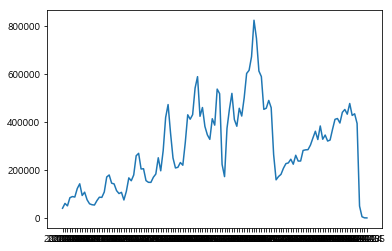

In [27]:
#그래프 그리기

plt.plot(df_filter['기준연월'], df_filter['관광'])
plt.show()

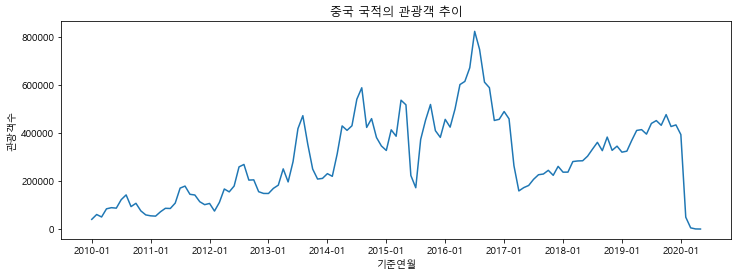

In [30]:
#그래프 다듬기

##크기조절

plt.figure(figsize = (12,4))

##내용설정(x,y축)

plt.plot(df_filter['기준연월'], df_filter['관광'])

##그래프 타이틀 및 X,Y축 이름달기

plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준연월')
plt.ylabel('관광객수')

## x축 눈금 값의 설정

plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

##그래프 그리기
plt.show()


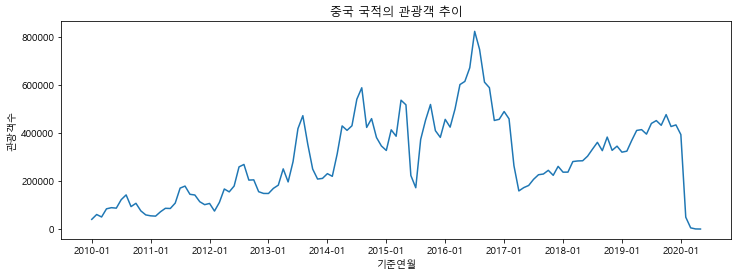

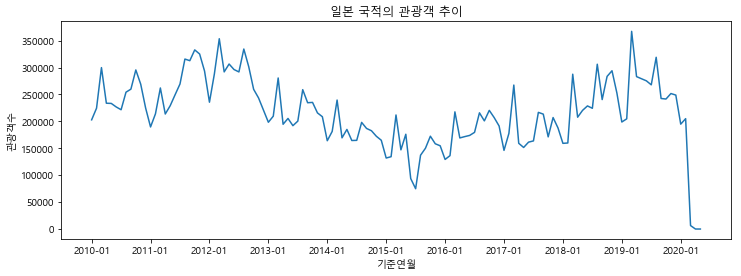

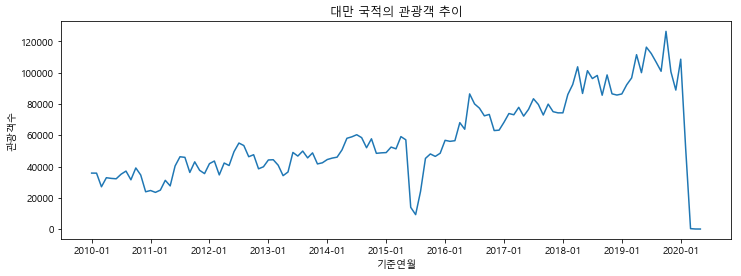

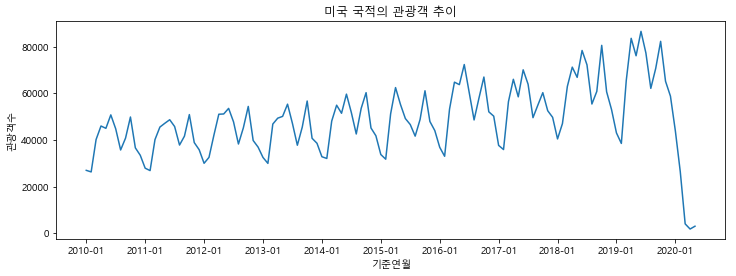

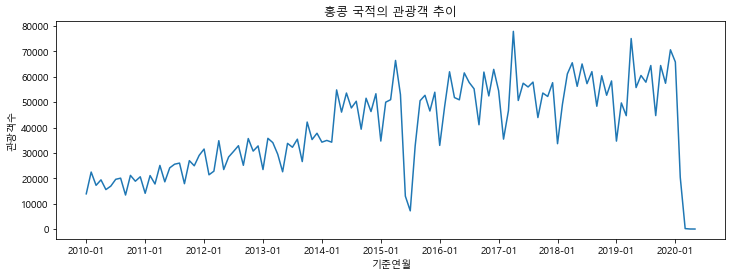

In [33]:
#여러 나라의 시계열 그래프 그려보기

cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

for country in cntry_list :
    
    condition = (df['국적'] == country)
    df_filtered = df[condition]
    
    plt.figure(figsize = (12,4))
    plt.plot(df_filtered['기준연월'], df_filtered['관광'])
    plt.title('{} 국적의 관광객 추이'.format(country))
    plt.xlabel('기준연월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
    plt.show()

In [34]:


#히트맵 그래프 그리기

##변수에 대해 잘 봐야함. X축을 월 Y측을 년으로 하여 그려볼 예정

In [35]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [36]:
# 기준연월을 년 / 월로 나누기

## slice함수는 문자열에 대해 가능한 함수 --> df는 Series의 형태이므로 str함수를 사용해야 한다.


df['년도'] = df['기준연월'].str.slice(0,4)
df['월'] = df['기준연월'].str.slice(5,7)

df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [42]:
#중국 데이터 추출하기

condition = (df.국적 == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [43]:
#df를 매트릭스 형태로 변환시키기

df_pivot = df_filter.pivot_table(values = '관광',
                                index = '년도',
                                columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [44]:
#seaborn 라이브러리 불러오기
##seaborn 라이브러리는 matplotlib에 종속되어 같이 불러와주어야 한다

import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

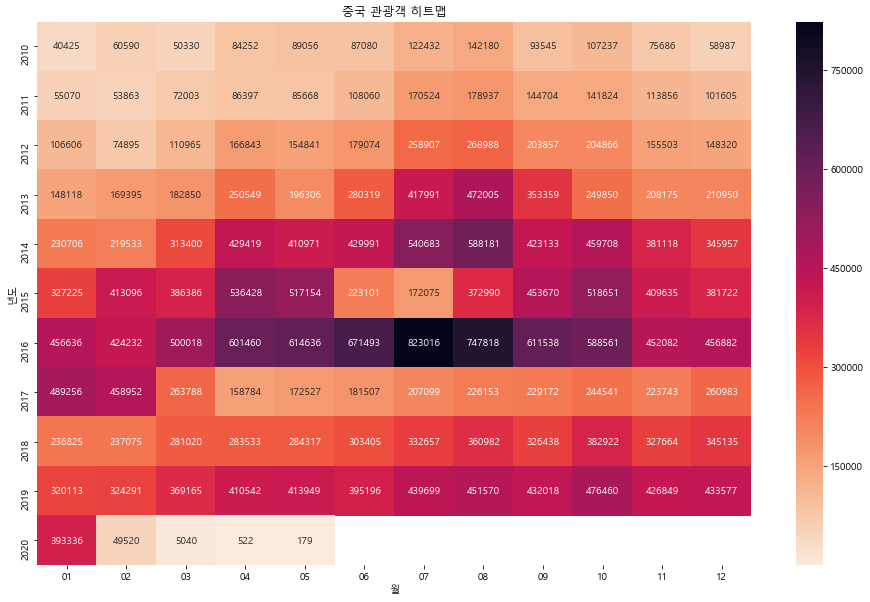

In [46]:
#히트맵그래프 그리기

##크기설정
plt.figure(figsize = (16,10))

## 히트맵 그래프 그리기 sns.heatmap(대상데이터, 그래프 각 칸에 실제 값 표시여부, 숫자형태를 소수점 없는 실수형으로, 색깔조합지정)
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

##그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

##그래프 표현
plt.show

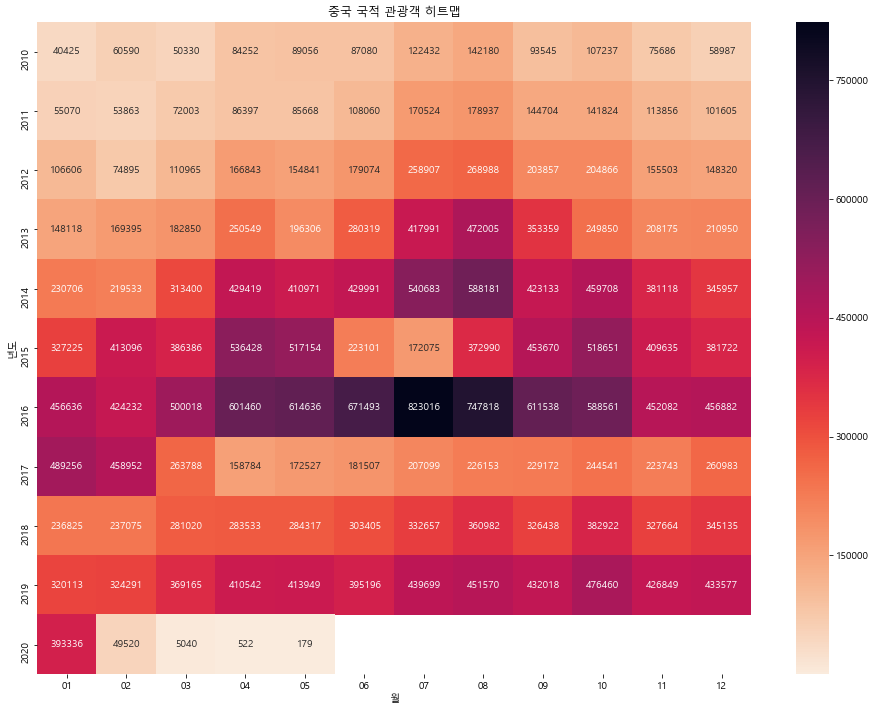

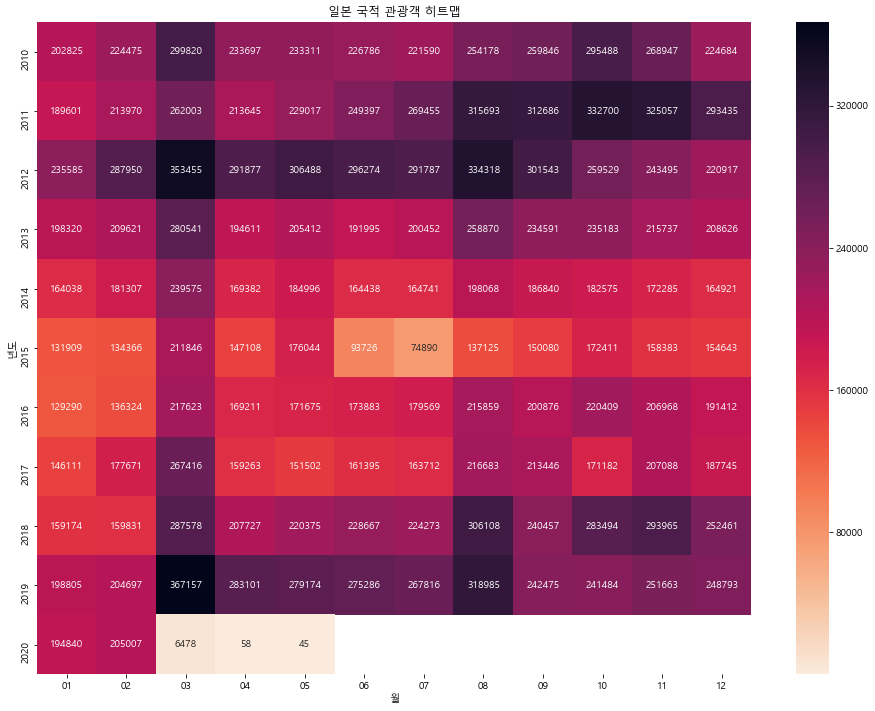

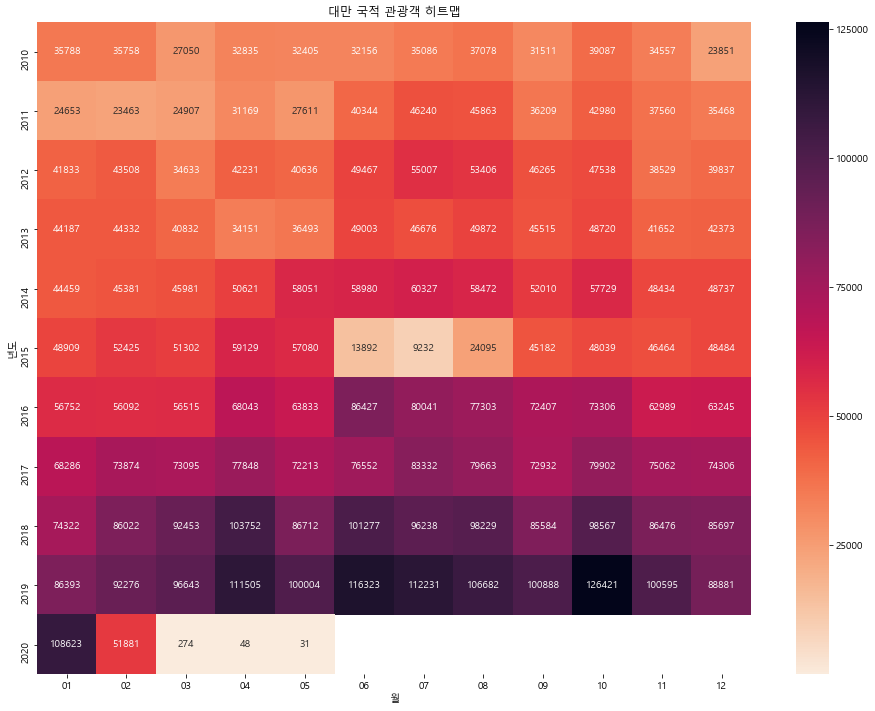

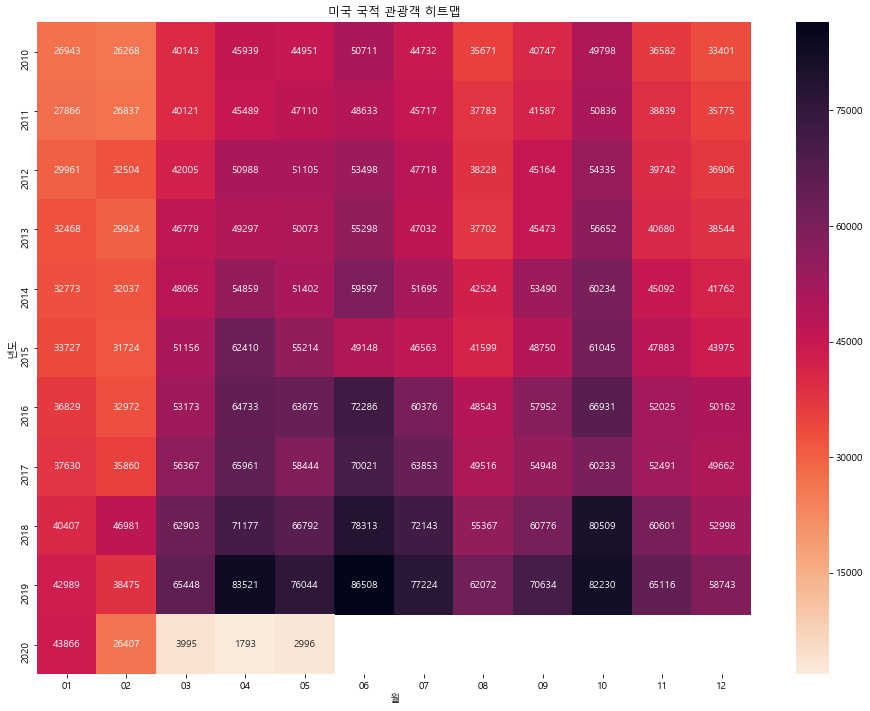

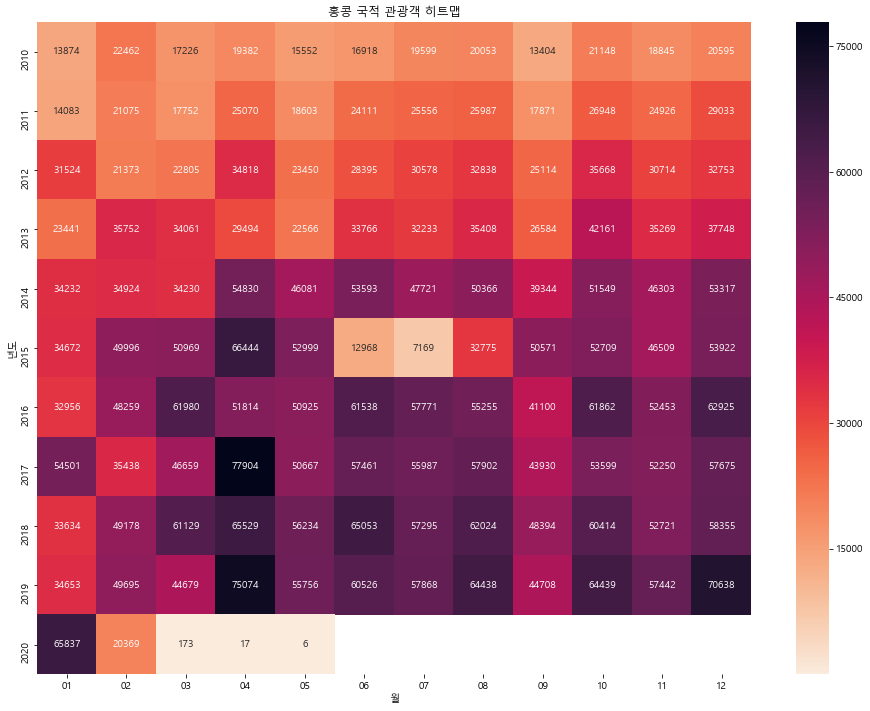

In [50]:
#여러 국가의 히트맵 그래프 그려보기

for country in cntry_list:
    
    condition = (df['국적'] == country)
    df_filter = df[condition]
    df_pivot = df_filter.pivot_table(values = '관광',
                                    index = '년도',
                                    columns = '월')
    
    plt.figure(figsize=(16,12))
    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
    plt.title('{} 국적 관광객 히트맵'.format(country))
    plt.show()
    
